**Problem Statement**

Ninjacart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology. They source fresh produce from farmers and deliver them to businesses within 12 hours. An integral component of their automation process is the development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.

As a starting point, ninjacart has provided us with a dataset scraped from the web which contains train and test folders, each having 4 sub-folders with images of onions, potatoes, tomatoes and some market scenes. We have been tasked with preparing a multiclass classifier for identifying these vegetables. The dataset provided has all the required images to achieve the task.

## **Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the data (10 points)**

    Visualize the data, use the dataset directory to create a list containing all the image paths in the training folder. You can use matplotlib or tensorflow to plot a grid sample of the images you fetched from the list of image paths.

    Plot a few of the images of each class to check their dimensions. [Note that the images are not all of uniform dimensions]

    Verify the count of images in each train and test folder by plotting histogram .

    Check each folder to see if the number of images matches the reported number.

# **Testing your best model so far(20 points)**
    Testing on the test set & Random image samples prediction[10]

    Summary & Insights [10]

In [ ]:
!gdown 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
#!unzip /content/ninjacart_data.zip -d /content/New_Folder/1

Downloading...
From: https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
To: /content/ninjacart_data.zip
100% 275M/275M [00:06<00:00, 43.3MB/s]


In [ ]:
#import shutil
#shutil.rmtree('ninjacart_data/')


In [ ]:
!unzip -q ninjacart_data.zip

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import random
import glob
import sklearn.metrics as metrics

Total Classes :  ['onion', 'indian market', 'tomato', 'potato']
Training - Total Images : 
 {'onion': 849, 'indian market': 599, 'tomato': 789, 'potato': 898}
Test - Total Images : 
 {'onion': 83, 'indian market': 81, 'tomato': 106, 'potato': 81}


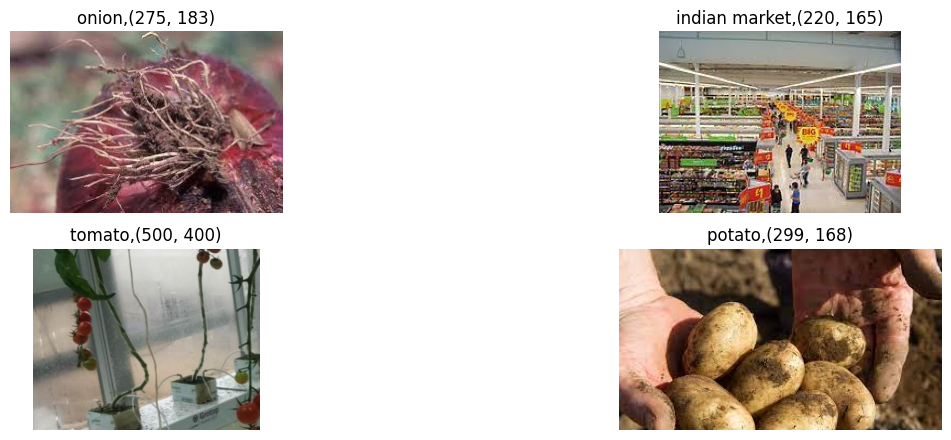

In [ ]:

class_dirs = os.listdir("/content/ninjacart_data/train") # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)
count_dict_test={}
print('Total Classes : ',class_dirs)
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/content/ninjacart_data/train/{cls}/*')
    #print(file_paths)
    count_dict[cls]=len(file_paths)
    image_path=random.choice(file_paths)
    image_dict[cls]=tf.keras.utils.load_img(image_path)

print('Training - Total Images : \n',count_dict)
#print('Test - Total Images :',len(test_ds))

#print(image_dict.keys())
plt.figure(figsize=(15,8))
for i,(cls,img) in enumerate(image_dict.items()):
  plt.subplot(3,2,i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'{cls},{img.size}')
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/content/ninjacart_data/test/{cls}/*')
    count_dict_test[cls]=len(file_paths)

print('Test - Total Images : \n',count_dict_test)

## Exploratory Data Analysis. (20 points)

Plotting class distribution & Visualizing Image dimensions with their plots[10]

Splitting the dataset into train, validation, and test set[10]

Text(0.5, 1.0, 'Test Dataset')

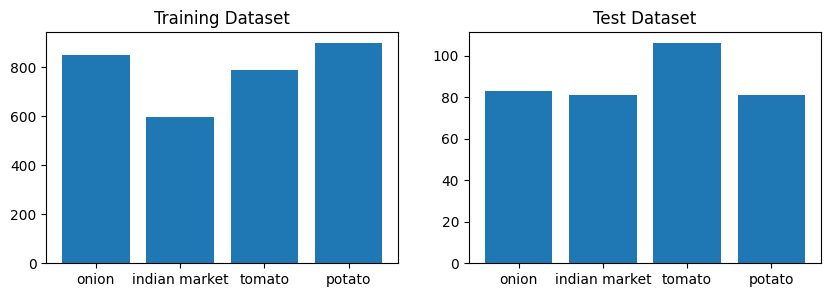

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.bar(count_dict.keys(),count_dict.values(),label=count_dict.values())
plt.title('Training Dataset')
plt.subplot(122)
plt.bar(count_dict_test.keys(),count_dict_test.values())
plt.title('Test Dataset')



    Split the dataset to a train and validation set.

    The provided data does not contain separate training and validation
    folders. For us to do hyperparameter tuning of our models, it is important
    to divide the dataset into an 80-20 split for training and validation respectively.

In [ ]:
#pip install split-folders

In [ ]:
'''import splitfolders
try:
  splitfolders.ratio("/content/ninjacart_data/train",seed=1337, output="ninjacart_data/Train", ratio=(0.8, 0.2))
except:
  pass'''

    Before fitting data to our model, we must make sure that each image is
    square-shaped so that we may resize it to the required dimensions and also
    perform rescaling which will rescale the inputs between 0-1 by dividing each value by 255.

In [ ]:
image_size = (128, 128)
train_ds,val_ds=tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/train',label_mode = 'categorical',image_size = image_size,validation_split=0.2,subset='both',shuffle=True,seed=42)
test_ds=tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/test',label_mode = 'categorical',image_size = image_size)
#val_ds=tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/train',image_size = image_size,validation_split=0.2,subset='validation',shuffle=True,seed=42)

height,width=128,128

Found 3135 files belonging to 4 classes.
Using 2508 files for training.
Using 627 files for validation.
Found 351 files belonging to 4 classes.


In [ ]:
'''train_ds=tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/Train/train')
val_ds=tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/Train/val')
test_ds=tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/test')

height,width=128,128
data_preprocess_with_flatten=keras.Sequential(
    name='data_preprocess_with_flatten'
    ,layers= [
              layers.Resizing(height,width),
             layers.Rescaling(1/255),
             #layers.Flatten(),
             ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_ds.map(lambda x, y: (data_preprocess_with_flatten(x), y))
val_ds = val_ds.map(lambda x, y: (data_preprocess_with_flatten(x), y))
test_ds=test_ds.map(lambda x,y : (data_preprocess_with_flatten(x),y))'''

"train_ds=tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/Train/train')\nval_ds=tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/Train/val')\ntest_ds=tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/test')\n\nheight,width=128,128\ndata_preprocess_with_flatten=keras.Sequential(\n    name='data_preprocess_with_flatten'\n    ,layers= [\n              layers.Resizing(height,width),\n             layers.Rescaling(1/255),\n             #layers.Flatten(),\n             ]\n)\n\n# Perform Data Processing on the train, val, test dataset\ntrain_ds = train_ds.map(lambda x, y: (data_preprocess_with_flatten(x), y))\nval_ds = val_ds.map(lambda x, y: (data_preprocess_with_flatten(x), y))\ntest_ds=test_ds.map(lambda x,y : (data_preprocess_with_flatten(x),y))"

In [ ]:
sample = next(iter(train_ds))[0]

#print(sample)


## Creating model architecture and training (50 points)

    Defining the CNN Classifier model from scratch[10]

    Improving Baseline CNN to reduce overfitting[10]

    Implementing Callbacks while training the model[10]

    Finetune pretrained models such as VGG, ResNet and MobileNet[10]

    Plotting the model training metrics and confusion matrix[10]



In [ ]:
#from tensorflow.keras import layers
#from tensorflow.keras import regularizers


In [ ]:
def plot_accuracy(model_fit):
    #accuracy graph

    x = range(0,len(model_fit.history.history['accuracy']))
    y_train = [acc * 100 for acc in model_fit.history.history['accuracy']]
    y_val = [acc * 100 for acc in model_fit.history.history['val_accuracy']]

    plt.plot(x, y_train, label='Train', color='b')
    #annot_max(x, y_train, xytext=(0.7,0.9))
    plt.plot(x, y_val, label='Val', color='r')
    #annot_max(x, y_val, xytext=(0.8,0.7))
    plt.ylabel('Accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()
    plt.show()

import seaborn as sns
def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets

    # generate confusion matrix and plot it
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

noise_path = '/content/ninjacart_data/test/indian market'
onion_path = '/content/ninjacart_data/test/onion'
potato_path = '/content/ninjacart_data/test/potato'
tomato_path = '/content/ninjacart_data/test/tomato'
def classwise_accuracy(class_path, class_name, model_name) :
    paths = []
    for i in os.listdir(class_path):
        paths.append(class_path + "/" + str(i))

    correct = 0
    total = 0

    for i in range(len(paths)):
        total+= 1

        img = tf.keras.utils.load_img(paths[i])
        img = tf.keras.utils.img_to_array(img)
        img = tf.image.resize(img, (128, 128))
        img = tf.expand_dims(img, axis = 0)

        pred = model_name.predict(img,verbose=0)
        if tf.argmax(pred[0]) == class_names.index(f"{class_name}"):
            correct+= 1

    print(f"Accuracy for class {class_name} is {round((correct/total)*100, 2)}% consisting of {len(paths)} images")

def model_evaluation_acc(model_name):
  # Evaluate the model
  loss, acc = model_name.evaluate(test_ds, verbose=2)
  print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

  y_pred = model_name.predict(test_ds)
  predicted_categories = tf.argmax(y_pred, axis=1)
  true_cat = tf.concat([y for x, y in test_ds], axis=0)
  true_categories = tf.argmax(true_cat, axis=1)

  # calculate accuracy
  test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
  print(f'\nTest Accuracy: {test_acc:.2f}%\n')

  classwise_accuracy(noise_path, 'noise', model_name)
  classwise_accuracy(onion_path, 'onion', model_name)
  classwise_accuracy(potato_path, 'potato', model_name)
  classwise_accuracy(tomato_path, 'tomato', model_name)

  ConfusionMatrix(model_name, test_ds, class_dirs)

In [ ]:
cnn_model = tf.keras.Sequential(
    name='cnn_model',
    layers=[
    layers.Rescaling(1./255),
    layers.InputLayer(input_shape = [128, 128, 3]),

    layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),

    layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'),

    layers.GlobalAveragePooling2D(),
    layers.Dense(4, activation = 'softmax')
])
cnn_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')
history=cnn_model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
79/79 [==============================] - 13s 133ms/step - loss: 0.9765 - accuracy: 0.5530 - val_loss: 0.7492 - val_accuracy: 0.6475
Epoch 2/5
79/79 [==============================] - 8s 95ms/step - loss: 0.6254 - accuracy: 0.7564 - val_loss: 0.6907 - val_accuracy: 0.7241
Epoch 3/5
79/79 [==============================] - 8s 92ms/step - loss: 0.5765 - accuracy: 0.7775 - val_loss: 0.5843 - val_accuracy: 0.7831
Epoch 4/5
79/79 [==============================] - 9s 106ms/step - loss: 0.5265 - accuracy: 0.7915 - val_loss: 0.5941 - val_accuracy: 0.7671
Epoch 5/5
79/79 [==============================] - 7s 86ms/step - loss: 0.5122 - accuracy: 0.8082 - val_loss: 0.4933 - val_accuracy: 0.7943


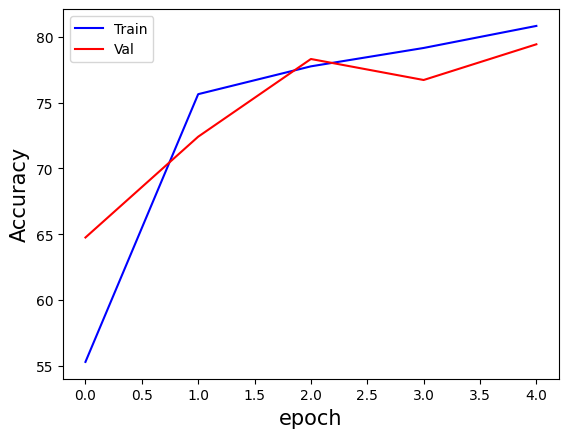

In [ ]:
plot_accuracy(cnn_model)

11/11 - 1s - loss: 0.7381 - accuracy: 0.6952 - 1s/epoch - 128ms/step
Restored model, accuracy: 69.52%
11/11 [==============================] - 2s 23ms/step

Test Accuracy: 25.93%

Accuracy for class noise is 43.21% consisting of 81 images
Accuracy for class onion is 50.6% consisting of 83 images
Accuracy for class potato is 80.25% consisting of 81 images
Accuracy for class tomato is 96.23% consisting of 106 images


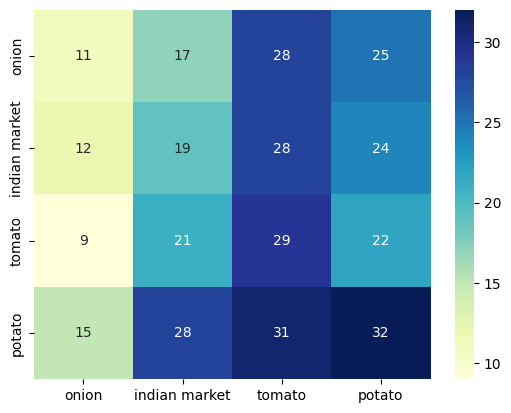

In [ ]:
# Evaluate the model
loss, acc = cnn_model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

y_pred = cnn_model.predict(test_ds)
predicted_categories = tf.argmax(y_pred, axis=1)
true_cat = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_cat, axis=1)

# calculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

classwise_accuracy(noise_path, 'noise', cnn_model)
classwise_accuracy(onion_path, 'onion', cnn_model)
classwise_accuracy(potato_path, 'potato', cnn_model)
classwise_accuracy(tomato_path, 'tomato', cnn_model)

ConfusionMatrix(cnn_model, test_ds, class_dirs)

1/1 [==============================] - 0s 17ms/step


<ipython-input-16-eb70b59218ba>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, n)


1/1 [==============================] - 0s 21ms/step


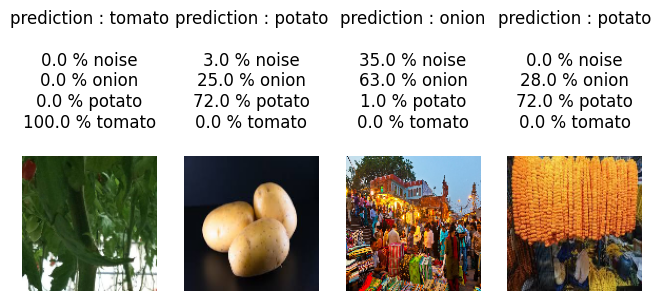

In [ ]:
test_dir = '/content/ninjacart_data/test'
test_images = []
class_names = ['noise', 'onion', 'potato', 'tomato']

for folder in os.listdir(test_dir):
  for image in os.listdir(test_dir + '/' + folder):
    test_images.append(os.path.join(test_dir, folder, image))
img_0 = tf.keras.utils.load_img(random.choice(test_images))
img_0 = tf.keras.utils.img_to_array(img_0)
img_0 = tf.image.resize(img_0, (128, 128))
img_1 = tf.expand_dims(img_0, axis = 0)

def grid_test_model(model_name):

  fig = plt.figure(1, figsize=(8, 8))
  plt.axis('off')
  n = 0
  for i in range(4):
    n += 1

    img_0 = tf.keras.utils.load_img(random.choice(test_images))
    img_0 = tf.keras.utils.img_to_array(img_0)
    img_0 = tf.image.resize(img_0, (128, 128))
    img_1 = tf.expand_dims(img_0, axis = 0)

    pred = model_name.predict(img_1)
    predicted_label = tf.argmax(pred, 1).numpy().item()

    for item in pred :
      item = tf.round((item*100))

    plt.subplot(2, 4, n)
    plt.axis('off')
    plt.title(f'prediction : {class_names[predicted_label]}\n\n'
              f'{item[0]} % {class_names[0]}\n'
              f'{item[1]} % {class_names[1]}\n'
              f'{item[2]} % {class_names[2]}\n'
              f'{item[3]} % {class_names[3]}\n')
    plt.imshow(img_0/255)
  plt.show()
grid_test_model(cnn_model)


In [ ]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(height_factor = 0.2, width_factor=0.2)
])

aug_ds = train_ds

for image, label in aug_ds :
  image = augmentation(image)

In [ ]:
cnn_model_imp_performance=keras.Sequential(
    name='cnn_model_imp_performance',
    layers=[
    layers.Rescaling(1./255)

    ,layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3))
    ,layers.BatchNormalization()
    ,layers.MaxPooling2D()

    ,layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')
    ,layers.BatchNormalization()
    ,layers.MaxPooling2D()

    ,layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')
    ,layers.BatchNormalization()
    ,layers.MaxPooling2D()

    ,layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')
    ,layers.BatchNormalization()
    ,layers.MaxPooling2D()

    ,layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')
    ,layers.BatchNormalization()
    ,layers.GlobalAveragePooling2D()
#    ,layers.AveragePooling2D()
    #,layers.Flatten()
    #,layers.Dense(256,activation='relu')
    ,layers.Dropout(0.2)
    ,layers.Dense(4,activation='softmax')
])

cnn_model_imp_performance.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')
history=cnn_model_imp_performance.fit(train_ds,epochs=20,validation_data=val_ds)

Epoch 1/20
79/79 [==============================] - 15s 106ms/step - loss: 0.6209 - accuracy: 0.7751 - val_loss: 1.2518 - val_accuracy: 0.4179
Epoch 2/20
79/79 [==============================] - 7s 83ms/step - loss: 0.4624 - accuracy: 0.8317 - val_loss: 1.0248 - val_accuracy: 0.4514
Epoch 3/20
79/79 [==============================] - 9s 105ms/step - loss: 0.4067 - accuracy: 0.8473 - val_loss: 2.8506 - val_accuracy: 0.3078
Epoch 4/20
79/79 [==============================] - 9s 100ms/step - loss: 0.3538 - accuracy: 0.8652 - val_loss: 1.1453 - val_accuracy: 0.5534
Epoch 5/20
79/79 [==============================] - 8s 84ms/step - loss: 0.3350 - accuracy: 0.8772 - val_loss: 0.8447 - val_accuracy: 0.6986
Epoch 6/20
79/79 [==============================] - 9s 104ms/step - loss: 0.3138 - accuracy: 0.8804 - val_loss: 0.7520 - val_accuracy: 0.7368
Epoch 7/20
79/79 [==============================] - 7s 83ms/step - loss: 0.3040 - accuracy: 0.8840 - val_loss: 0.7489 - val_accuracy: 0.7241
Epoch 8/

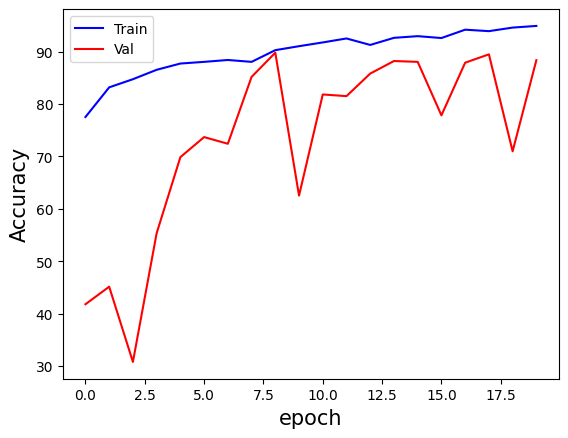

In [ ]:
plot_accuracy(cnn_model_imp_performance)

11/11 - 1s - loss: 0.5181 - accuracy: 0.8262 - 837ms/epoch - 76ms/step
Restored model, accuracy: 82.62%
11/11 [==============================] - 1s 20ms/step

Test Accuracy: 22.51%

Accuracy for class noise is 53.09% consisting of 81 images
Accuracy for class onion is 77.11% consisting of 83 images
Accuracy for class potato is 90.12% consisting of 81 images
Accuracy for class tomato is 100.0% consisting of 106 images


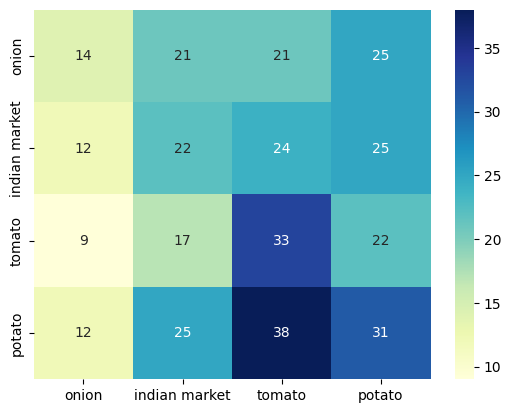

In [ ]:
model_evaluation_acc(cnn_model_imp_performance)

# **We observe an accuracy jump of ~10 % by just :**
    Applying augmentation to our data
    Adding Dropout and BatchNormalization
    Implementing callbacks during training

    Use a model of your choice (could be vgg, resnet and mobilenet) and train it with an appropriate batch size.

    Using the pretrained weights of popular networks is a great way to do
     transfer learning, since the size of our original dataset is small.

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights=True
)
pretrained_model=tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(128,128,3))
pretrained_model.trainable=False
VGG16_model=tf.keras.Sequential([
    pretrained_model,
    #layers.Flatten(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(4,activation='softmax')
    ])
VGG16_model.compile(optimizer='Adam', metrics='accuracy', loss='categorical_crossentropy')

history=VGG16_model.fit(train_ds,epochs=20,validation_data=val_ds,callbacks=[early_stopping_cb],verbose=0)
#pretrained_model.summary()

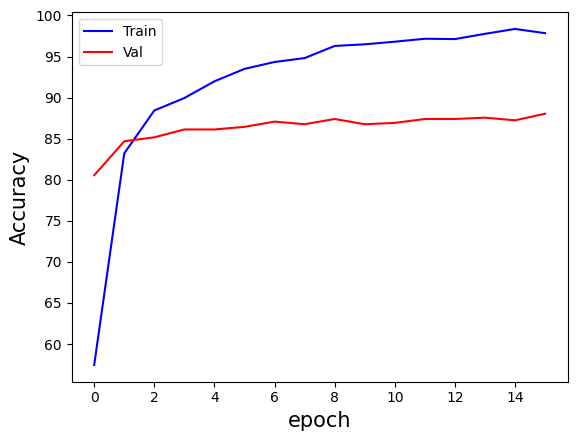

In [ ]:
plot_accuracy(VGG16_model)

11/11 - 1s - loss: 1.0080 - accuracy: 0.8490 - 1s/epoch - 103ms/step
Restored model, accuracy: 84.90%
11/11 [==============================] - 1s 50ms/step

Test Accuracy: 27.35%

Accuracy for class noise is 80.25% consisting of 81 images
Accuracy for class onion is 86.75% consisting of 83 images
Accuracy for class potato is 70.37% consisting of 81 images
Accuracy for class tomato is 98.11% consisting of 106 images


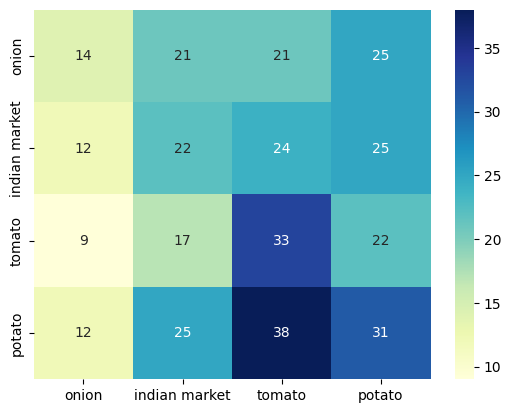

In [ ]:
model_evaluation_acc(VGG16_model)

In [ ]:
'''early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights=True
)'''
pretrained_model=tf.keras.applications.VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))
pretrained_model.trainable=False
VGG19_model=tf.keras.Sequential([
    pretrained_model,
    #layers.Flatten(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(4,activation='softmax')
    ])
VGG19_model.compile(optimizer='Adam', metrics='accuracy', loss='categorical_crossentropy')

history=VGG19_model.fit(aug_ds,epochs=20,validation_data=val_ds,verbose=0)
#pretrained_model.summary()

80134624/80134624 [==============================] - 1s 0us/step


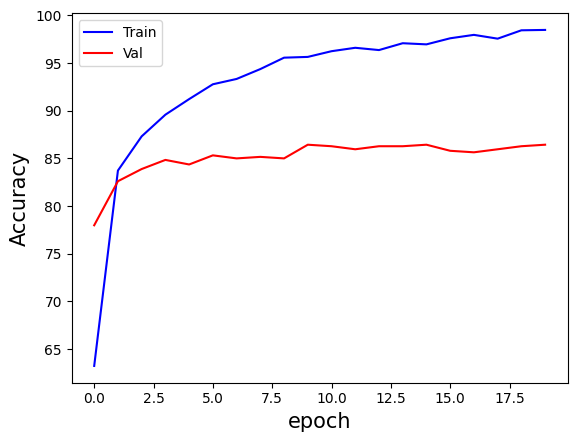

11/11 - 1s - loss: 1.2442 - accuracy: 0.8661 - 1s/epoch - 114ms/step
Restored model, accuracy: 86.61%
11/11 [==============================] - 1s 56ms/step

Test Accuracy: 27.64%

Accuracy for class noise is 83.95% consisting of 81 images
Accuracy for class onion is 87.95% consisting of 83 images
Accuracy for class potato is 71.6% consisting of 81 images
Accuracy for class tomato is 100.0% consisting of 106 images


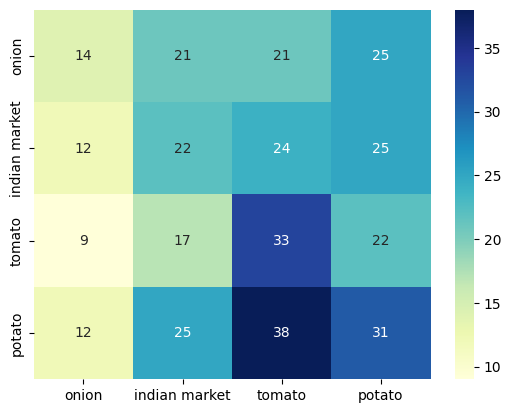

In [ ]:
plot_accuracy(VGG19_model)
model_evaluation_acc(VGG19_model)

In [ ]:
'''early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights=True
)'''
pretrained_model=tf.keras.applications.ResNet101(weights='imagenet',include_top=False,input_shape=(128,128,3))
pretrained_model.trainable=False
ResNet101_model=tf.keras.Sequential([
    pretrained_model,
    #layers.Flatten(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(4,activation='softmax')
    ])
ResNet101_model.compile(optimizer='Adam', metrics=['accuracy','Precision','Recall'], loss='categorical_crossentropy')

history=ResNet101_model.fit(train_ds,epochs=20,validation_data=val_ds)
#pretrained_model.summary()

Epoch 1/20
79/79 [==============================] - 19s 142ms/step - loss: 0.4171 - accuracy: 0.8529 - precision: 0.8685 - recall: 0.8425 - val_loss: 0.2149 - val_accuracy: 0.9282 - val_precision: 0.9326 - val_recall: 0.9266
Epoch 2/20
79/79 [==============================] - 10s 120ms/step - loss: 0.1474 - accuracy: 0.9458 - precision: 0.9494 - recall: 0.9422 - val_loss: 0.1756 - val_accuracy: 0.9362 - val_precision: 0.9391 - val_recall: 0.9346
Epoch 3/20
79/79 [==============================] - 10s 114ms/step - loss: 0.0932 - accuracy: 0.9653 - precision: 0.9702 - recall: 0.9621 - val_loss: 0.1722 - val_accuracy: 0.9490 - val_precision: 0.9535 - val_recall: 0.9490
Epoch 4/20
79/79 [==============================] - 9s 99ms/step - loss: 0.0642 - accuracy: 0.9781 - precision: 0.9804 - recall: 0.9757 - val_loss: 0.1726 - val_accuracy: 0.9522 - val_precision: 0.9537 - val_recall: 0.9522
Epoch 5/20
79/79 [==============================] - 11s 129ms/step - loss: 0.0463 - accuracy: 0.9892 -

In [ ]:
loss, acc,precision,recall = ResNet101_model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc),'precision:',precision,'recall:',recall)


11/11 - 2s - loss: 0.5689 - accuracy: 0.8348 - precision: 0.8439 - recall: 0.8319 - 2s/epoch - 175ms/step
Restored model, accuracy: 83.48% precision: 0.8439306616783142 recall: 0.8319088220596313


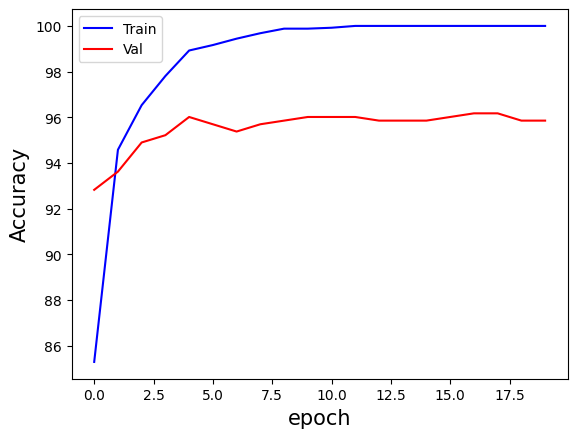

11/11 - 1s - loss: 0.5454 - accuracy: 0.8860 - precision: 0.8886 - recall: 0.8860 - 1s/epoch - 115ms/step
Restored model, accuracy: 88.60% precision: 0.8885714411735535 recall: 0.8860399127006531
11/11 [==============================] - 4s 74ms/step

Test Accuracy: 25.93%

Accuracy for class noise is 81.48% consisting of 81 images
Accuracy for class onion is 91.57% consisting of 83 images
Accuracy for class potato is 76.54% consisting of 81 images
Accuracy for class tomato is 100.0% consisting of 106 images


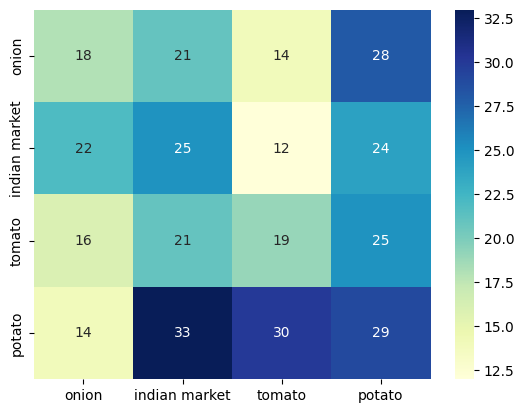

In [ ]:
plot_accuracy(ResNet101_model)
loss, acc,precision,recall = ResNet101_model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc),'precision:',precision,'recall:',recall)

y_pred = ResNet101_model.predict(test_ds)
predicted_categories = tf.argmax(y_pred, axis=1)
true_cat = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_cat, axis=1)

# calculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

classwise_accuracy(noise_path, 'noise', ResNet101_model)
classwise_accuracy(onion_path, 'onion', ResNet101_model)
classwise_accuracy(potato_path, 'potato', ResNet101_model)
classwise_accuracy(tomato_path, 'tomato', ResNet101_model)

ConfusionMatrix(cnn_model, test_ds, class_dirs)

# **Testing our best model (ResNet)**
    ResNet achieved the highest accuracy of 94% among all the models we trained

    Let's test our Finetuned ResNet to predict on some random unseen data to visualize how accurate it is !

In [ ]:
ResNet101_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 4, 4, 2048)        42658176  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_26 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 42666372 (162.76 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 42658176 (162.73 MB)
_________________________________________________________________


1/1 [==============================] - 0s 46ms/step


<ipython-input-16-eb70b59218ba>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, n)


1/1 [==============================] - 0s 48ms/step


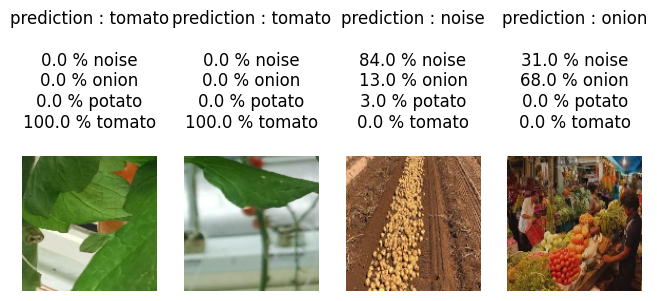

In [ ]:
grid_test_model(ResNet101_model)